In [46]:
pip install scikit-fuzzy


1.964726631393298


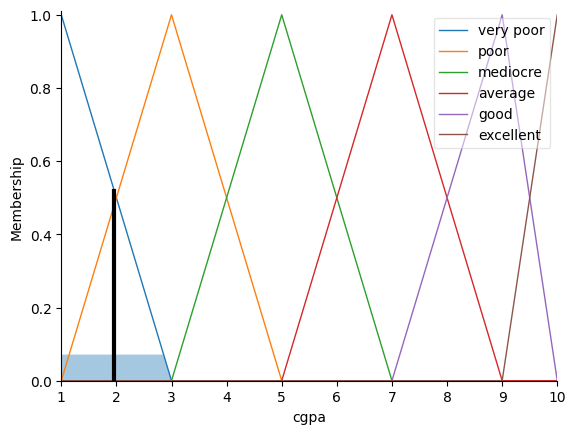

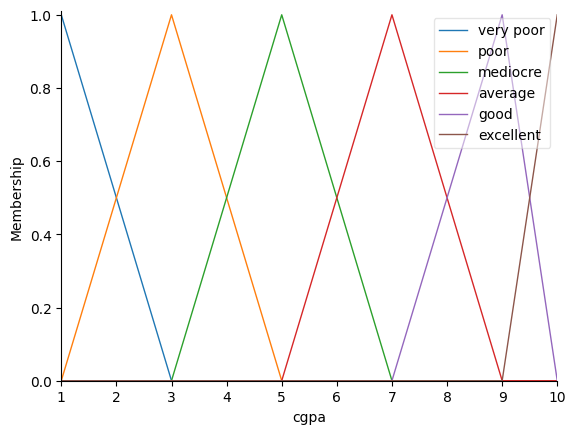

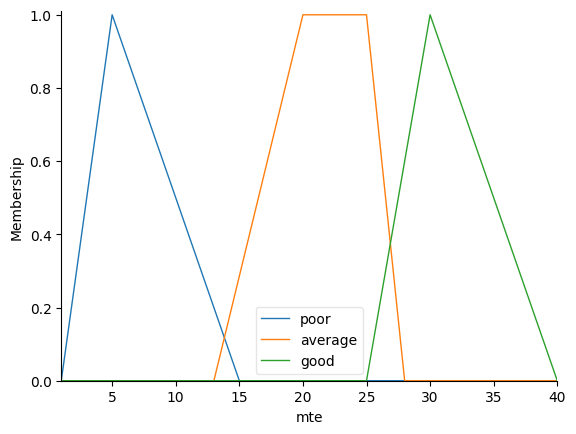

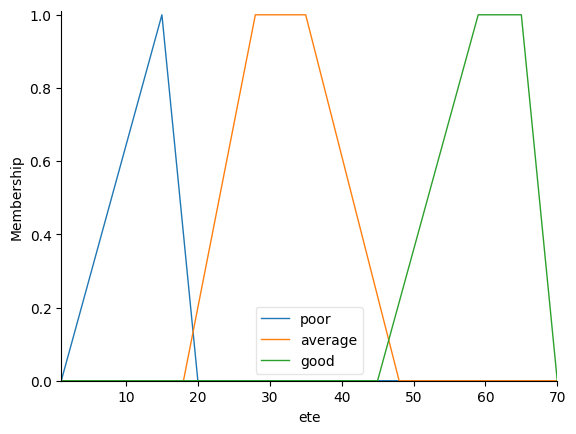

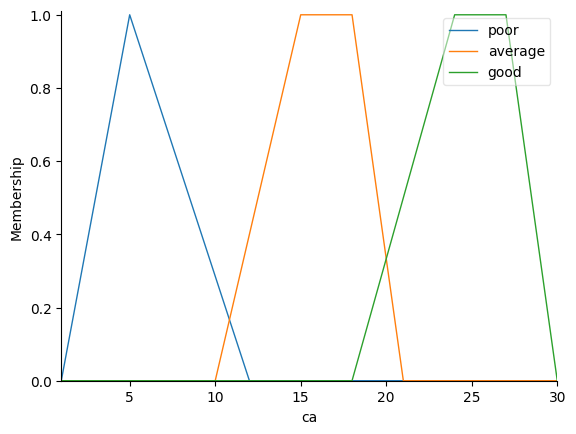

In [45]:
import skfuzzy as fuzzy
import numpy as np
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the antecedents (inputs)
mte = ctrl.Antecedent(np.arange(1, 41, 1), 'mte')
mte['poor'] = fuzzy.trimf(mte.universe, [1, 5, 15])
mte['average'] = fuzzy.trapmf(mte.universe, [13, 20, 25, 28])
mte['good'] = fuzzy.trimf(mte.universe, [25, 30, 40])

ete = ctrl.Antecedent(np.arange(1, 71, 1), 'ete')
ete['poor'] = fuzzy.trimf(ete.universe, [1, 15, 20])
ete['average'] = fuzzy.trapmf(ete.universe, [18, 28, 35, 48])
ete['good'] = fuzzy.trapmf(ete.universe, [45, 59, 65, 70])

ca = ctrl.Antecedent(np.arange(1, 31, 1), 'ca')
ca['poor'] = fuzzy.trimf(ca.universe, [1, 5, 12])
ca['average'] = fuzzy.trapmf(ca.universe, [10, 15, 18, 21])
ca['good'] = fuzzy.trapmf(ca.universe, [18, 24, 27, 30])

# Define the consequent (output)
cgpa = ctrl.Consequent(np.arange(1, 11, 1), 'cgpa')

# Manually define membership functions for cgpa
cgpa['very poor'] = fuzzy.trimf(cgpa.universe, [1, 1, 3])
cgpa['poor'] = fuzzy.trimf(cgpa.universe, [1, 3, 5])
cgpa['mediocre'] = fuzzy.trimf(cgpa.universe, [3, 5, 7])
cgpa['average'] = fuzzy.trimf(cgpa.universe, [5, 7, 9])
cgpa['good'] = fuzzy.trimf(cgpa.universe, [7, 9, 10])
cgpa['excellent'] = fuzzy.trimf(cgpa.universe, [9, 10, 10])
#cgpa.automf(5)


# Define the rules
rule1 = ctrl.Rule(ca['average'] & mte['poor'] & ete['good'], cgpa['good'])
rule2 = ctrl.Rule(ca['average'] & mte['poor'] & ete['average'], cgpa['average'])
rule3 = ctrl.Rule(ca['good'] & mte['average'] & ete['poor'], cgpa['poor'])
rule4 = ctrl.Rule(ca['poor'] & mte['good'] & ete['good'], cgpa['average'])
rule5 = ctrl.Rule(ca['good'] & mte['good'] & ete['good'], cgpa['excellent'])
rule6 = ctrl.Rule(ca['poor'] & mte['poor'] & ete['poor'], cgpa['very poor'])
rule7 = ctrl.Rule(ca['poor'] & mte['poor'] & ete['average'], cgpa['poor'])
rule8 = ctrl.Rule(ca['poor'] & mte['average'] & ete['average'], cgpa['mediocre'])

# Create the control system
tipping = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])


# Simulate the control system
Tip = ctrl.ControlSystemSimulation(tipping)

# Provide inputs
Tip.input['ca'] = 2
Tip.input['mte'] = 2
Tip.input['ete'] = 2

# Compute the output
Tip.compute()

# Print the output
print(Tip.output['cgpa'])
cgpa.view(sim=Tip)

# View membership functions
cgpa.view()
mte.view()
ete.view()
ca.view()
plt.show()
plt.show()


